<a href="https://colab.research.google.com/github/maneeshb-prog/Demo_XYZ/blob/main/Shop_Ease_E_Commmerse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as plt

In [ ]:
# reading the data from the csv file and displaying the results

EComm = pd.read_csv('shopease_user_data.csv')
EComm

,user_id,age,gender,location,session_duration,pages_visited,clicked_ad,purchase,amount_spent,test_group
0,1001,56,Female,Miami,18.7,13,0,0,0.00,B
1,1002,46,Female,Los Angeles,22.0,10,1,1,309.67,B
2,1003,32,Female,Miami,15.6,9,1,1,344.70,B
3,1004,60,Male,Miami,19.8,3,1,0,0.00,B
4,1005,25,Female,Miami,6.1,7,0,0,0.00,A
...,...,...,...,...,...,...,...,...,...,...
295,1296,44,Male,Miami,7.2,12,0,0,0.00,B
296,1297,44,Male,Miami,13.6,2,0,0,0.00,A
297,1298,51,Male,Miami,8.9,6,0,0,0.00,A
298,1299,38,Female,Houston,13.0,2,1,0,0.00,B


In [ ]:
# Verifying if the data has any issues and requires cleansing..

EComm.isna().sum()

,0
user_id,0
age,0
gender,0
location,0
session_duration,0
pages_visited,0
clicked_ad,0
purchase,0
amount_spent,0
test_group,0


In [ ]:
# Step 2: Despriptive Analytics

EComm.describe()

,user_id,age,session_duration,pages_visited,clicked_ad,purchase,amount_spent
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1150.500000,39.073333,12.192000,7.733333,0.410000,0.313333,80.590100
std,86.746758,12.505301,4.870696,4.196139,0.492655,0.464624,140.047701
min,1001.000000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1075.750000,28.000000,9.000000,4.000000,0.000000,0.000000,0.000000
50%,1150.500000,40.000000,12.300000,8.000000,0.000000,0.000000,0.000000
75%,1225.250000,50.000000,15.625000,12.000000,1.000000,1.000000,119.272500
max,1300.000000,60.000000,25.800000,14.000000,1.000000,1.000000,491.020000


In [ ]:
# Find the average session duration and average pages visited by users
SessDurAvg = EComm[['session_duration', 'pages_visited']].mean()
SessDurAvg

,0
session_duration,12.192000
pages_visited,7.733333


In [25]:
# Compare the average purchase amount by gender.
avgpurAmt = EComm.groupby('gender')['amount_spent'].mean()
display(avgpurAmt)

,amount_spent
gender,
Female,80.601322
Male,81.237534
Other,77.684545


In [32]:
# Find the conversion rate (percentage of users who purchased) overall.
conversion_rate = EComm['purchase'].mean() * 100
print(f"Overall Conversion Rate: {conversion_rate:.2f}%")

Overall Conversion Rate: 31.33%


In [28]:
# Step 3: Group Analysis
#  1. Group by location to find which city has the highest conversion rate.

CityConversion = EComm.groupby('location')['purchase'].mean() * 100
print(f"City Conversion Rates:\n{CityConversion.to_string(float_format='%.2f')}%")

City Conversion Rates:
location
Chicago       31.67
Houston       30.77
Los Angeles   24.19
Miami         31.25
New York      38.71%


In [ ]:
# 2. Group by age ranges (e.g., 18–25, 26–35, 36–50, 50+) and analyze purchase behavior.

# Task
Analyze purchase behavior of users grouped by age ranges (18-25, 26-35, 36-50, 50+) from the `EComm` DataFrame. Calculate the conversion rate and average amount spent for each age group, visualize these metrics using a bar chart with appropriate labels and a legend, and summarize the observed trends and insights.

## Create Age Bins

### Subtask:
Define age ranges (e.g., 18-25, 26-35, 36-50, 50+) and categorize users into these groups by creating a new column in the EComm DataFrame.


**Reasoning**:
To categorize users into defined age ranges, I will create a new 'age_group' column in the EComm DataFrame using `pd.cut()` with the specified bins and labels.



In [33]:
age_bins = [18, 25, 35, 50, EComm['age'].max()]
age_labels = ['18-25', '26-35', '36-50', '50+']
EComm['age_group'] = pd.cut(EComm['age'], bins=age_bins, labels=age_labels, right=True, include_lowest=True)
print("Age groups created and added to the EComm DataFrame:")
display(EComm[['age', 'age_group']].head())

Age groups created and added to the EComm DataFrame:


,age,age_group
0,56,50+
1,46,36-50
2,32,26-35
3,60,50+
4,25,18-25


## Analyze Purchase Behavior by Age Group

### Subtask:
Calculate the conversion rate (percentage of users who purchased) and the average amount spent for each defined age group.


**Reasoning**:
To analyze purchase behavior by age group, I will group the DataFrame by 'age_group' and then calculate the mean of 'purchase' (for conversion rate) and 'amount_spent' for each group.



In [34]:
age_group_analysis = EComm.groupby('age_group').agg(
    conversion_rate=('purchase', lambda x: x.mean() * 100),
    average_amount_spent=('amount_spent', 'mean')
)
print("Purchase behavior by age group:")
display(age_group_analysis.round(2))

Purchase behavior by age group:


/tmp/ipython-input-2444644985.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_analysis = EComm.groupby('age_group').agg(


,conversion_rate,average_amount_spent
age_group,,
18-25,32.26,82.64
26-35,32.76,83.50
36-50,26.13,69.67
50+,37.68,93.87


**Reasoning**:
To address the `FutureWarning` from pandas, I will explicitly set `observed=False` in the `groupby()` method. This will ensure the code continues to behave as intended while removing the warning message.



In [35]:
age_group_analysis = EComm.groupby('age_group', observed=False).agg(
    conversion_rate=('purchase', lambda x: x.mean() * 100),
    average_amount_spent=('amount_spent', 'mean')
)
print("Purchase behavior by age group:")
display(age_group_analysis.round(2))

Purchase behavior by age group:


,conversion_rate,average_amount_spent
age_group,,
18-25,32.26,82.64
26-35,32.76,83.50
36-50,26.13,69.67
50+,37.68,93.87


**Reasoning**:
To visualize the conversion rate by age group, I will create a bar chart using matplotlib, ensuring it has a title, appropriate axis labels, and displays the conversion rates clearly for each age group.



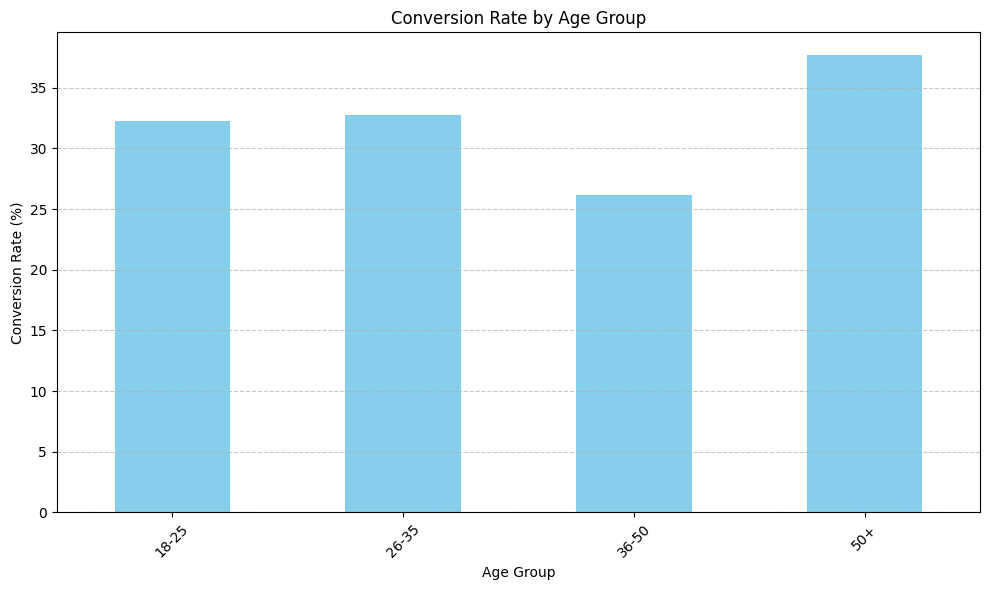

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
age_group_analysis['conversion_rate'].plot(kind='bar', color='skyblue')
plt.title('Conversion Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Reasoning**:
To visualize the average amount spent by age group, I will create another bar chart using matplotlib, ensuring it has a title, appropriate axis labels, and displays the average amount spent for each age group.



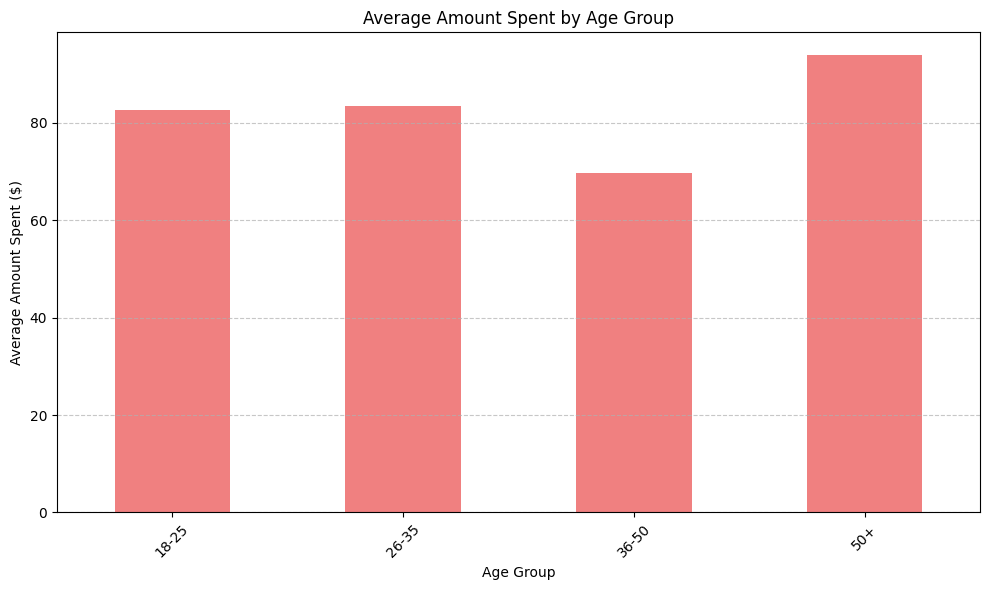

In [38]:
plt.figure(figsize=(10, 6))
age_group_analysis['average_amount_spent'].plot(kind='bar', color='lightcoral')
plt.title('Average Amount Spent by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Amount Spent ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Summary of Purchase Behavior by Age Group

**Conversion Rate:**
* The age group **50+** shows the highest conversion rate at approximately **37.68%**.
* The age groups **18-25** and **26-35** have similar conversion rates, around **32.26%** and **32.76%** respectively.
* The **36-50** age group exhibits the lowest conversion rate at approximately **26.13%**.

**Average Amount Spent:**
* Users in the **50+** age group also spend the highest average amount, approximately **$93.87**.
* The **18-25** and **26-35** age groups have comparable average spending, at around **$82.64** and **$83.50** respectively.
* The **36-50** age group spends the least on average, approximately **$69.67**.

**Overall Insights:**
* The **50+** age group appears to be the most valuable segment, demonstrating both the highest conversion rate and the highest average amount spent.
* The **36-50** age group shows the lowest engagement and spending, suggesting they might require different marketing strategies or product offerings.
* The younger age groups (**18-25** and **26-35**) show moderate conversion and spending, indicating potential for growth with targeted efforts.

## Summary:

### Data Analysis Key Findings

*   The age group **50+** demonstrates the highest purchase intent, with a conversion rate of approximately 37.68%, and also spends the most on average, at around \$93.87.
*   The **36-50** age group shows the lowest engagement and spending across all segments, with a conversion rate of approximately 26.13% and an average amount spent of about \$69.67.
*   The younger age groups, **18-25** and **26-35**, exhibit similar and moderate purchase behavior; the 18-25 group has a conversion rate of approximately 32.26% and an average spend of \$82.64, while the 26-35 group has a conversion rate of 32.76% and an average spend of \$83.50.

### Insights or Next Steps

*   Focus marketing efforts on the **50+** age group, as they are the most valuable segment in terms of both conversion and average spend.
*   Investigate the lower engagement in the **36-50** age group to understand underlying reasons and develop targeted strategies, such as tailored product offerings or marketing messages, to improve their conversion and spending.


In [42]:
# Group by gender to compare average time spent and pages visited.
AvgTimeSpent_pagesVisited = EComm.groupby('gender').agg(AvgTime=('session_duration', lambda x: x.mean()),
    pageVisited=('pages_visited', 'mean'))

print("Average time spent on pages visisted byt gender:")
display(AvgTimeSpent_pagesVisited.round(2))

Average time spent on pages visisted byt gender:


,AvgTime,pageVisited
gender,,
Female,11.73,7.62
Male,12.42,7.73
Other,12.88,8.18


In [41]:
result = EComm.groupby('gender')[['session_duration', 'pages_visited']].mean()
display(result)

,session_duration,pages_visited
gender,,
Female,11.732231,7.619835
Male,12.417808,7.726027
Other,12.878788,8.181818


In [ ]:
#  Step 4: Visualization with Matplotlib
#  Plot a histogram of session durations.
#  Plot a bar chart showing conversion rate by gender.
#  Plot a line chart showing average purchase amount by age group.

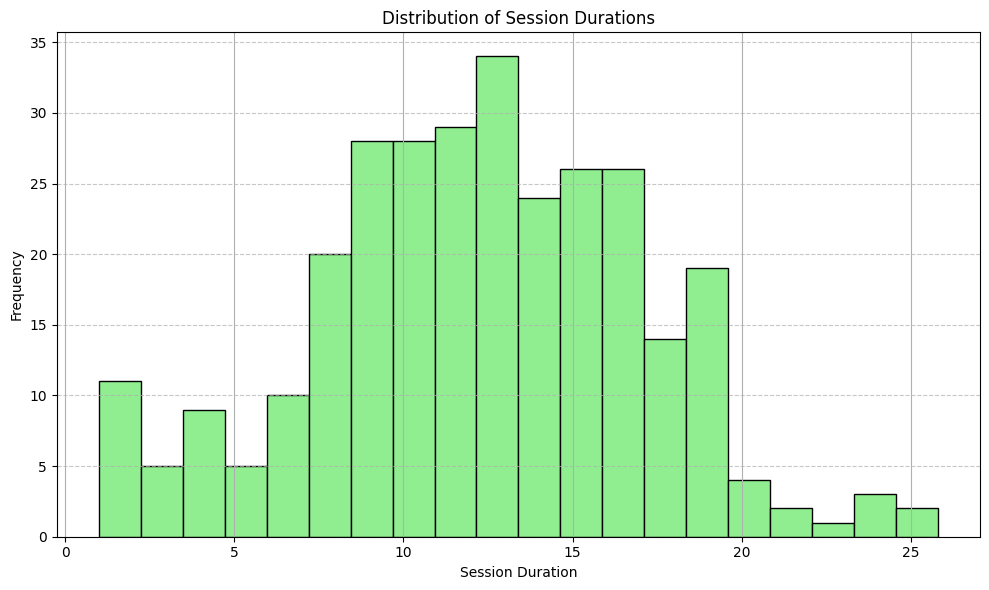

In [43]:
#  Plot a histogram of session durations.

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
EComm['session_duration'].hist(bins=20, edgecolor='black', color='lightgreen')
plt.title('Distribution of Session Durations')
plt.xlabel('Session Duration')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

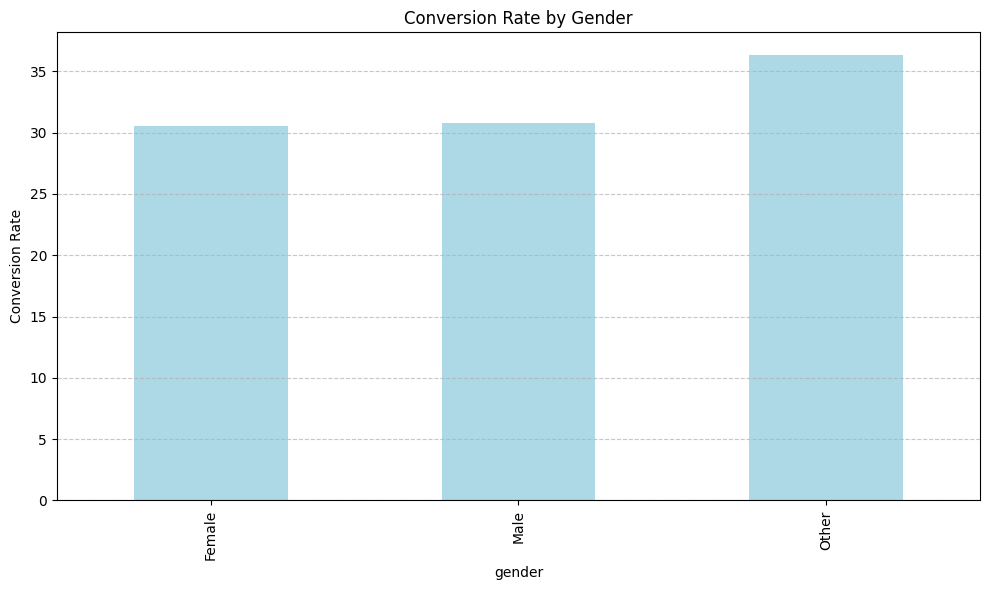

In [48]:
# Plot a bar chart showing conversion rate by gender.
plt.figure(figsize=(10, 6))
Conrate = EComm.groupby('gender')['purchase'].mean()*100
Conrate.plot(kind='bar', color='lightblue')
plt.title('Conversion Rate by Gender')
plt.xlabel('gender')
plt.ylabel('Conversion Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [46]:
conversion_rate_by_gender = EComm.groupby('gender')['purchase'].mean() * 100
print("Conversion Rate by Gender:")
display(conversion_rate_by_gender.round(2))

Conversion Rate by Gender:


,purchase
gender,
Female,30.58
Male,30.82
Other,36.36


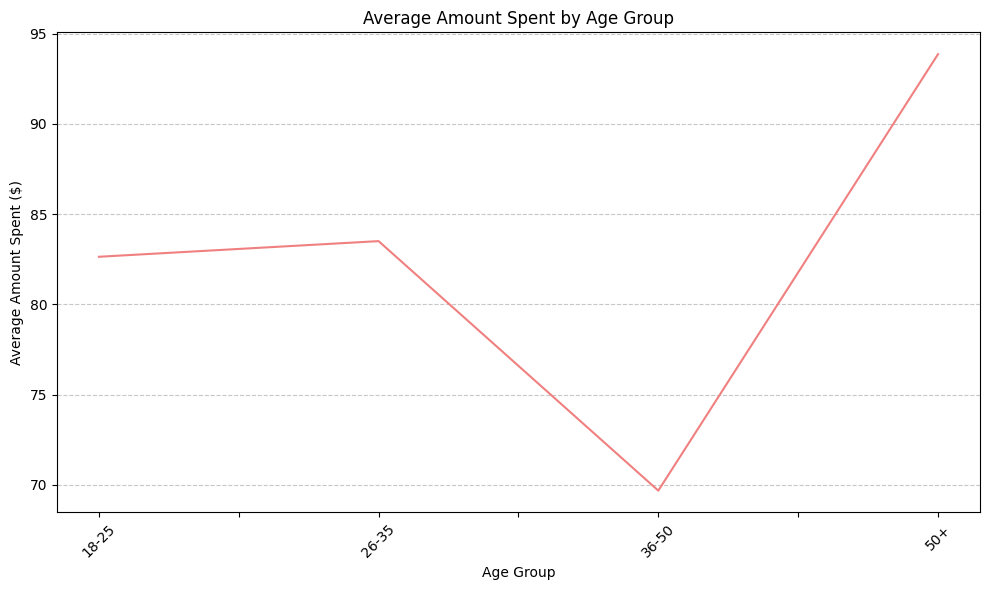

In [49]:
#  Plot a line chart showing average purchase amount by age group.

plt.figure(figsize=(10, 6))
age_group_analysis['average_amount_spent'].plot(kind='line', color='lightcoral')
plt.title('Average Amount Spent by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Amount Spent ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

*Step* 5: A/B Test Analysis

The company tested two different webpage designs:
Group A: Current website design


Group B: New website design


Your task:
Compare average session duration, average pages visited, and conversion rate between Group A and Group B.


Perform a simple statistical test (t-test) to check if there is a significant difference in conversion rates.


Conclude which webpage design performed better in terms of engagement and conversion rate.
**bold text**

In [ ]:
ABTesting = EComm.groupby('test_group').agg(
    average_session_duration=('session_duration', 'mean'),
    average_pages_visited=('pages_visited', 'mean'),
    conversion_rate=('purchase', lambda x: x.mean() * 100)
)
ABTesting

,average_session_duration,average_pages_visited,conversion_rate
test_group,,,
A,11.750932,7.975155,33.540373
B,12.702878,7.453237,28.776978


In [52]:
from statsmodels.stats.proportion import proportions_ztest

# Filter data for Group A and Group B
group_A = EComm[EComm['test_group'] == 'A']
group_B = EComm[EComm['test_group'] == 'B']

# Calculate conversions and observations for each group
conversions_A = group_A['purchase'].sum()
nobs_A = len(group_A)

conversions_B = group_B['purchase'].sum()
nobs_B = len(group_B)

# Perform proportions z-test
count = [conversions_A, conversions_B]
nobs = [nobs_A, nobs_B]

z_stat, p_value = proportions_ztest(count, nobs)

print(f"Group A Conversions: {conversions_A} out of {nobs_A}")
print(f"Group B Conversions: {conversions_B} out of {nobs_B}")
print(f"Z-statistic: {z_stat:.2f}")
print(f"P-value: {p_value:.3f}")

alpha = 0.05  # Significance level
if p_value < alpha:
    print(f"With a p-value of {p_value:.3f}, which is less than {alpha}, we reject the null hypothesis.")
    print("There is a statistically significant difference in conversion rates between Group A and Group B.")
else:
    print(f"With a p-value of {p_value:.3f}, which is greater than {alpha}, we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in conversion rates between Group A and Group B.")

Group A Conversions: 54 out of 161
Group B Conversions: 40 out of 139
Z-statistic: 0.89
P-value: 0.375
With a p-value of 0.375, which is greater than 0.05, we fail to reject the null hypothesis.
There is no statistically significant difference in conversion rates between Group A and Group B.


Find the conversion rate (percentage of users who purchased) overall.
Sure, I can help you find the overall conversion rate. I will calculate the percentage of users who purchased from the EComm DataFrame.


Please explain this error:

The error AttributeError: 'list' object has no attribute 'sum' means you're trying to call the .sum() method on a Python list, ['gender'], which doesn't have that method. To calculate the average purchase amount by gender, you should select the amount_spent column after grouping by gender and then apply the .mean() method.


what is the use of len function
The len() function in Python is used to return the number of items (length) of an object. This object can be a sequence (like a string, tuple, list, or range) or a collection (like a dictionary, set, or frozenset).

For example:

len('hello') would return 5
len([1, 2, 3, 4]) would return 4
len({'a': 1, 'b': 2}) would return 2 (the number of key-value pairs)

what len(EComm) gives?
When you use len(EComm), it will return the total number of rows in the EComm DataFrame. In this case, EComm has 300 rows, so len(EComm) would give you 300.


Please explain this error:

The KeyError: 'Column not found: 1175.0' happened because the calculation for the conversion rate was applied to the entire DataFrame first, resulting in a single number 1175.0. Then, the code tried to use this number as a column name within the groupby('location') result, which doesn't exist. To find the conversion rate per city, you should calculate the mean of the purchase column for each location group and then multiply by 100. This is because if 'purchase' is 0 or 1, the mean represents the proportion of purchases.

The conversion rates by city are:

New York: 38.71%
Chicago: 31.67%
Miami: 31.25%
Houston: 30.77%
Los Angeles: 24.19%
From these results, New York has the highest conversion rate at 38.71%.


print(f"Overall Conversion Rate: {conversion_rate:.2f}%")
Okay, I will print the overall conversion rate using the code you provided.


group by location to find which city has the highest conversion rate
From our previous analysis, we found that New York has the highest conversion rate at 38.71%. Here are the conversion rates for all cities:

New York: 38.71%
Chicago: 31.67%
Miami: 31.25%
Houston: 30.77%
Los Angeles: 24.19%
The overall conversion rate across all users is 31.33%.


Group by age ranges (e.g., 18–25, 26–35, 36–50, 50+) and analyze purchase behavior.
Okay, I will create age ranges, group the data by these ranges, analyze purchase behavior within each group, and visualize the findings. Here is the plan:

Create Age Bins: Define age ranges (e.g., 18-25, 26-35, 36-50, 50+) and categorize users into these groups by creating a new column in the EComm DataFrame.
Analyze Purchase Behavior by Age Group: Calculate the conversion rate (percentage of users who purchased) and the average amount spent for each defined age group.
Visualize Purchase Behavior by Age Group: Generate a bar chart to visualize the conversion rates and average amount spent across different age groups. Ensure the plot has appropriate labels and a legend.
Final Task: Provide a summary of the purchase behavior observed across the different age ranges, highlighting any significant trends or insights.
Generating...
Preparing
Create Age Bins
Analyze Purchase Behavior by Age Group
Finish task
Visualize Purchase Behavior by Age Group
Final Task

can you explain this code "pageVisited=('pages_visited', 'mean')"

Certainly! The code snippet pageVisited=('pages_visited', 'mean') is used within a pandas .agg() function call. It's a way to specify how to aggregate a particular column and what to name the resulting aggregated column.

Here's a breakdown:

pageVisited: This is the new name that will be given to the column containing the aggregated result in your output DataFrame.
('pages_visited', 'mean'): This is a tuple where:
'pages_visited' is the original column from your DataFrame that you want to perform the aggregation on.
'mean' is the aggregation function to apply. In this case, it calculates the average (mean) of the values in the 'pages_visited' column for each group.
So, in summary, this line tells pandas: 'For the pages_visited column, calculate its mean, and then label this result in the new DataFrame as pageVisited'.


plot a simple histogram of session durations
Sure, I can plot a histogram of the session durations for you. This will help us understand the distribution of how long users spend on the platform.

The histogram showing the distribution of session durations has been successfully plotted. This visualization helps us understand how user session times are distributed. Most sessions appear to be concentrated in the lower duration ranges, with fewer sessions lasting for very long periods.


how to use group by if we need to calculate the converstion rate
To calculate the conversion rate using groupby(), you typically follow these steps:

Ensure your 'conversion' column is binary (0 or 1): In your EComm DataFrame, the purchase column already serves this purpose, where 1 indicates a purchase (conversion) and 0 indicates no purchase.

Group your DataFrame: Use the groupby() method on the categorical column you want to analyze (e.g., 'gender', 'location', 'age_group'). This separates your data into distinct groups.

Calculate the mean of the conversion column: For each group, calculate the mean of your binary conversion column (purchase). When a column contains only 0s and 1s, the mean() of that column directly gives you the proportion of 1s (i.e., the conversion rate).

Convert to percentage (optional but common): Multiply the resulting mean by 100 to express it as a percentage.

Here's an example of how to calculate the conversion rate by gender:

Here are the conversion rates by gender:

Female: 30.58%
Male: 30.82%
Other: 36.36%
It appears that the 'Other' gender category has the highest conversion rate among the groups.


Please explain this error:

The error IndexError: Column(s) ['session_duration', 'pages_visited'] already selected indicates that you are trying to select columns from your grouped data in a way that isn't allowed. Once you've selected session_duration and pages_visited from the groupby object, you can't immediately select another column like purchase using bracket notation. To calculate all these metrics at once, it's best to use the .agg() method after grouping.

The A/B testing analysis shows the following for each group:

Group A (Current website design):

Average Session Duration: 11.75 minutes
Average Pages Visited: 7.98 pages
Conversion Rate: 33.54%
Group B (New website design):

Average Session Duration: 12.70 minutes
Average Pages Visited: 7.45 pages
Conversion Rate: 28.78%
Conclusion:

Engagement: Group B has a slightly higher average session duration (12.70 minutes vs. 11.75 minutes), suggesting users spend more time on the new design. However, Group A has a higher average number of pages visited (7.98 pages vs. 7.45 pages), indicating users explore more content on the old design.
Conversion Rate: Group A (the current website design) has a significantly higher conversion rate at 33.54% compared to Group B's 28.78%. This indicates that the current design is more effective at converting users into purchasers.
Based on these metrics, Group A (the current website design) performed better in terms of conversion rate and pages visited, while Group B had a slightly longer session duration. To make a definitive conclusion for the best performing design, a statistical test (t-test) on the conversion rates would be beneficial to determine if the observed difference is statistically significant.


Perform a simple statistical test (t-test) to check if there is a significant difference in conversion rates.
To check for a significant difference in conversion rates between Group A and Group B, I will perform a two-sample z-test for proportions. This test will help us determine if the observed difference is likely due to chance or a real effect of the webpage design.

The statistical test comparing the conversion rates of Group A and Group B has been completed:

Group A Conversions: 54 out of 161 (33.54%)

Group B Conversions: 40 out of 139 (28.78%)

Z-statistic: 0.89

P-value: 0.375

Interpretation: The P-value (0.375) is greater than our chosen significance level (alpha = 0.05). This means that we fail to reject the null hypothesis. In practical terms, the observed difference in conversion rates between Group A and Group B is not statistically significant.

This implies that while Group A had a numerically higher conversion rate, the difference is likely due to random chance rather than a true effect of the new webpage design (Group B). Therefore, based on this test, there is no strong evidence to conclude that one webpage design performs significantly better than the other in terms of conversion rate.


Conclude which webpage design performed better in terms of engagement and conversion rate
Based on our analysis of the A/B test for the two webpage designs:

Engagement:

Session Duration: Group B (new design) had a slightly longer average session duration (12.70 minutes) compared to Group A (current design) (11.75 minutes).
Pages Visited: Group A (current design) had a slightly higher average number of pages visited (7.98 pages) compared to Group B (new design) (7.45 pages).
This indicates a mixed result for engagement, with Group B showing longer time spent, but Group A leading in the number of pages explored.

Conversion Rate:

Group A (current design) showed a numerically higher conversion rate of 33.54%.
Group B (new design) had a conversion rate of 28.78%.
Statistical Significance: However, the proportions z-test revealed a p-value of 0.375, which is greater than the significance level of 0.05. This means that the observed difference in conversion rates between Group A and Group B is not statistically significant.

Overall Conclusion: While Group A (the current design) had a numerically higher conversion rate and more pages visited, the statistical test indicates that this difference is not significant enough to confidently say one design is better than the other in terms of conversion. For engagement, the results are mixed. Therefore, there is no statistically significant evidence to conclude that the new webpage design (Group B) performed better than the current design (Group A), particularly regarding conversion rate. The current design (Group A) maintains a slightly better, though not statistically significant, performance in conversion and pages visited.



A/B test results with conclusion (which design ShopEase should keep)

Based on the comprehensive A/B test analysis, here's a summary of the results and the recommended design for ShopEase:

A/B Test Results Summary:

Group A (Current Website Design):
Average Session Duration: 11.75 minutes
Average Pages Visited: 7.98 pages
Conversion Rate: 33.54%
Group B (New Website Design):
Average Session Duration: 12.70 minutes
Average Pages Visited: 7.45 pages
Conversion Rate: 28.78%
Statistical Significance:

A proportions z-test was conducted to compare the conversion rates of Group A and Group B. The resulting p-value was 0.375, which is greater than the standard significance level (alpha = 0.05). This means there is no statistically significant difference in conversion rates between the two designs.
Conclusion and Recommendation for ShopEase:

Conversion Rate: While Group A (the current design) showed a numerically higher conversion rate (33.54% vs. 28.78%), this difference was not statistically significant. This indicates that the new design (Group B) did not demonstrably improve conversion rates over the current design.
Engagement: The engagement metrics were mixed:
Group B had a slightly longer average session duration, suggesting users might spend more time on the new design.
Group A led in the average number of pages visited, indicating users explore more content on the current design.
Recommendation: Given that the new design (Group B) did not show a statistically significant improvement in conversion rates, and engagement metrics were mixed, ShopEase should keep the current website design (Group A). Implementing the new design would incur development and deployment costs without clear evidence of improved performance, especially in the critical area of conversion.

Further iterations or different A/B tests might be needed if ShopEase still wishes to explore improvements to their website design.